<a href="https://colab.research.google.com/github/jbonesTroy/Intro-to-Machine-Learning/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

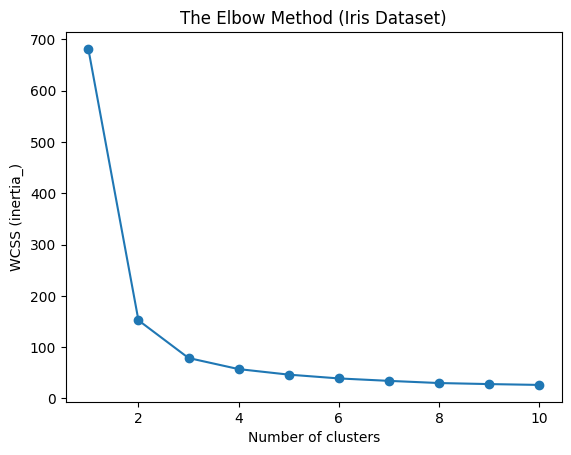

Explanation:
The KMeans algorithm clusters data by minimizing inertia, which is the sum of squared errors (WCSS).
Inertia measures how internally coherent clusters are. The 'elbow' at k=3 shows the optimal number of clusters.

Loading MNIST dataset...


In [ ]:
# ===========================================
# Part 1: Iris Dataset - Elbow Method (15.18)
# ===========================================

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = iris.data

# Store WCSS (within-cluster sum of squares)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=11, n_init=10)
    kmeans.fit(X)
    # inertia_ = within-cluster sum of squared distances
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title("The Elbow Method (Iris Dataset)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (inertia_)")
plt.show()

print("Explanation:")
print("The KMeans algorithm clusters data by minimizing inertia, which is the sum of squared errors (WCSS).")
print("Inertia measures how internally coherent clusters are. The 'elbow' at k=3 shows the optimal number of clusters.")


# ===========================================
# Part 2: MNIST Logistic Regression with PCA (15.21) - Optimized
# ===========================================

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

# Load MNIST dataset
print("\nLoading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# (Optional speed-up for homework/testing: uncomment below)
# X, y = X[:20000], y[:20000]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# Logistic Regression WITHOUT PCA
# ------------------------
start = time.time()
logisticRegr = LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1)
logisticRegr.fit(X_train_scaled, y_train)
y_pred = logisticRegr.predict(X_test_scaled)
end = time.time()

acc_no_pca = accuracy_score(y_test, y_pred)
time_no_pca = end - start

print(f"\nWithout PCA -> Accuracy: {acc_no_pca:.4f}, Time: {time_no_pca:.2f} seconds")


# ------------------------
# Logistic Regression WITH PCA
# ------------------------
# Keep 95% of variance
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

start = time.time()
logisticRegr_pca = LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1)
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
end = time.time()

acc_pca = accuracy_score(y_test, y_pred_pca)
time_pca = end - start

print(f"With PCA (95% variance) -> Accuracy: {acc_pca:.4f}, Time: {time_pca:.2f} seconds")

# ------------------------
# Comparison Summary
# ------------------------
print("\nSummary Comparison:")
print(f"Accuracy without PCA: {acc_no_pca:.4f}, Time: {time_no_pca:.2f} sec")
print(f"Accuracy with PCA:    {acc_pca:.4f}, Time: {time_pca:.2f} sec")
